In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Bar
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
import pymysql
import warnings
warnings.filterwarnings('ignore') 

# FIGURE 1

In [2]:
# LOAD DATA
Figure_1_data = pd.read_pickle('data_Fig_1_main.pkl')
novelty = Figure_1_data.dropna(subset=["Novelty"]) 
convergence = Figure_1_data.dropna(subset=["Convergence"])
interdisciplinarity = Figure_1_data.dropna(subset=["Interdisciplinarity"]) 

novelty_matched = pd.read_pickle('data_Fig_1_noveltyInsert.pkl') 
convergence_matched = pd.read_pickle('data_Fig_1_convergenceInsert.pkl') 
interdisciplinarity_matched = pd.read_pickle('data_Fig_1_interdisciplinarityInsert.pkl') 

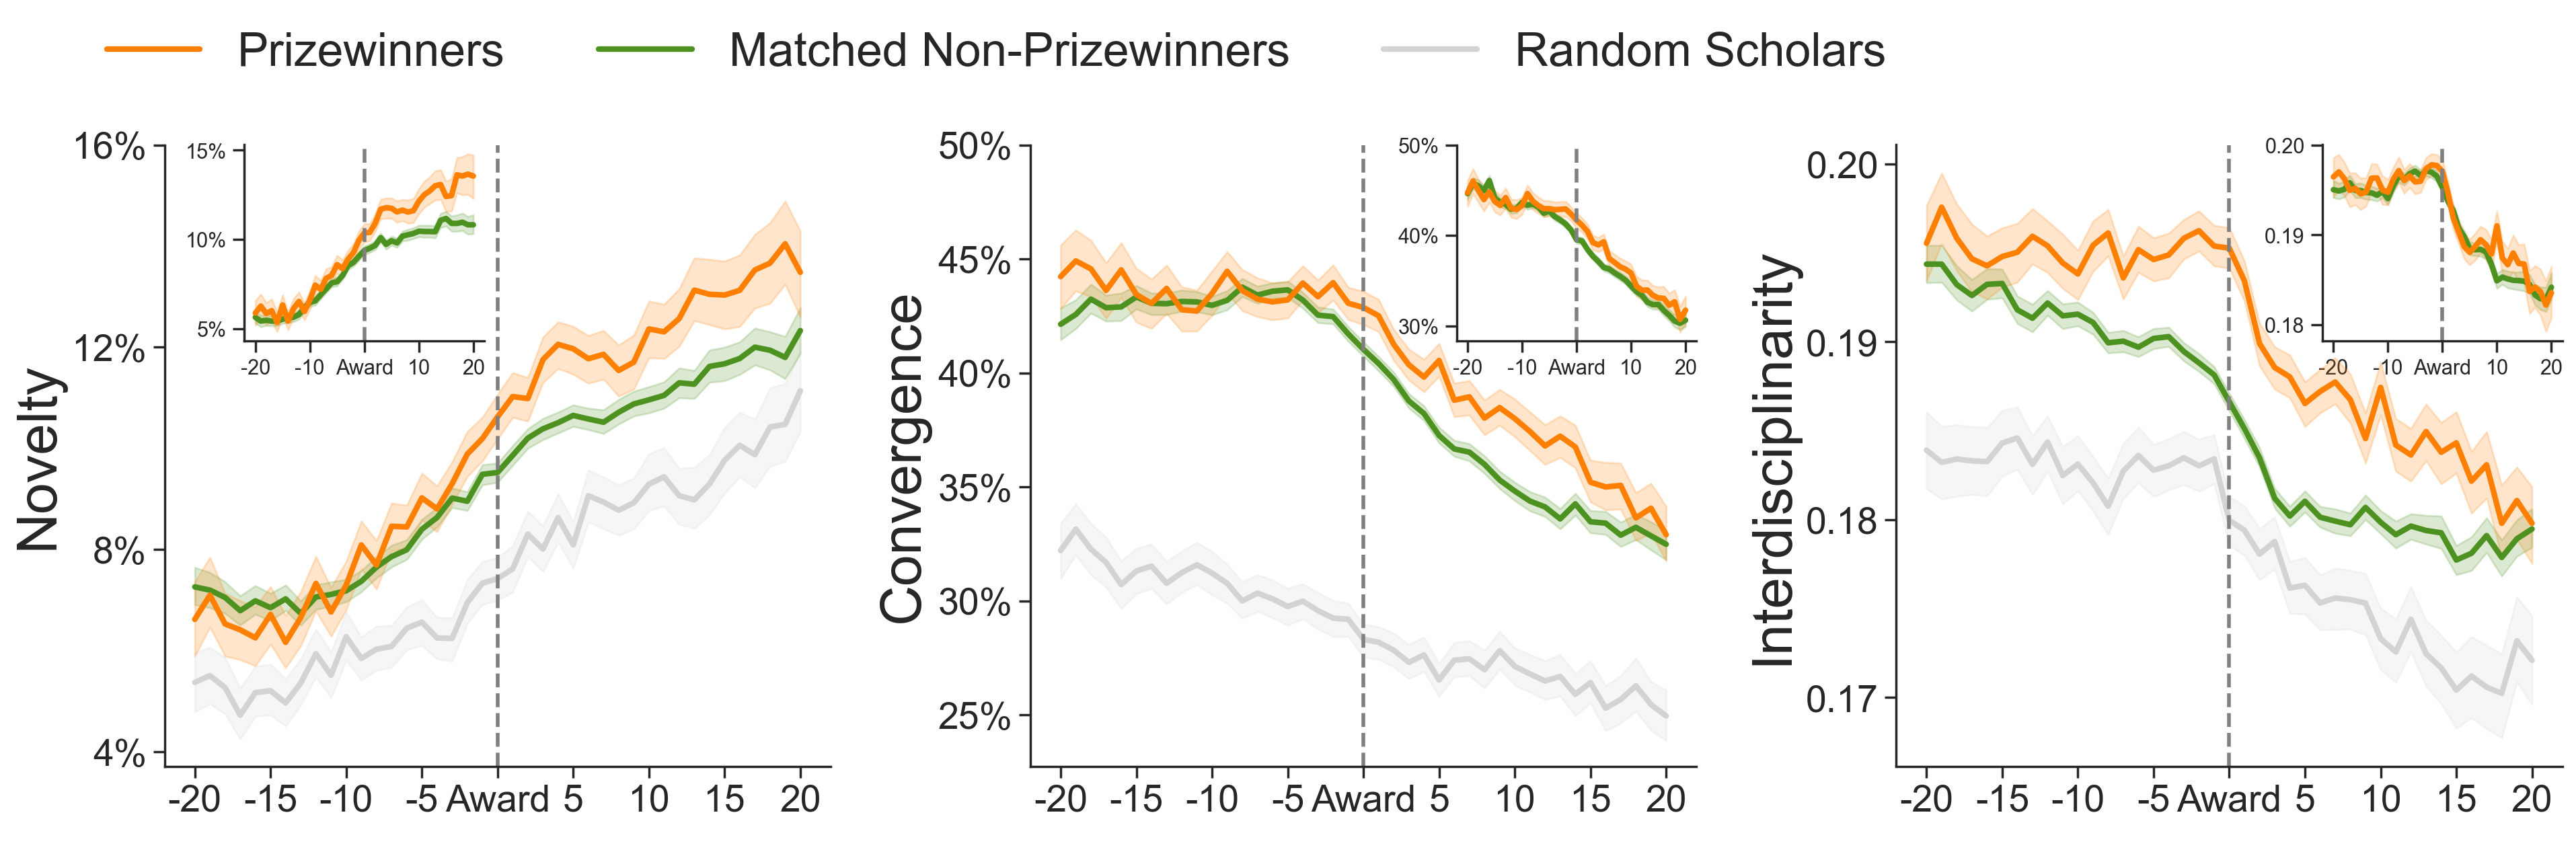

In [3]:
# FIGURE 1 

def main_figure(df, y, ylabel, ax):
    sns.lineplot(
        x="Relative_Publication_year", y=y, data=df,
        hue="Type", palette=color_dict_four, size='Type',
        hue_order=['Random Scholars', 'Matched Non-Prizewinners', 'Prizewinners'],
        sizes=[3, 3, 3],
        ax=ax
    )
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axvline(x=0, color="grey", ls="--", lw=2)
    ax.set_ylabel(ylabel, fontsize=30)
    ax.set_xlabel(" ")
    ax.set_xticks([-20, -15, -10, -5, 0, 5, 10, 15, 20])
    ax.set_xticklabels(["-20", "-15", "-10", "-5", "Award", "5", "10", "15", "20"], fontsize=20)
    ax.tick_params(axis='y', labelsize=20)

def insert_figure(df, y, ax, yticks=None, ylim=None):
    sns.lineplot(
        x="Relative_Publication_year", y=y, data=df,
        hue="Type", palette=color_dict_four, size='Type',
        hue_order=['Matched Non-Prizewinners', 'Prizewinners'],
        sizes=[3, 3],
        legend=False,
        ax=ax
    )
    ax.axvline(x=0, color="grey", ls="--", lw=2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([-20, -10, 0, 10, 20])
    ax.set_xticklabels(["-20", "-10", "Award", "10", "20"])

    if ylim:
        ax.set_ylim(*ylim)
    if yticks:
        ax.set_yticks(yticks)

def to_percent(temp, position):
    return '%.0f' % (100 * temp) + '%'

# ======== Draw FIGURE 1========
fig = plt.figure(dpi=200, figsize=(23, 6))
plt.subplots_adjust(wspace=0.3, hspace=0)
sns.set(style="ticks")

# ======== COLOR SETTING ========
color_dict_four = {
    "Prizewinners": '#ff7f00',
    "Matched Non-Prizewinners": '#4d9221',
    "Random Scholars": 'lightgrey'
}

# ------------------------- Novelty -------------------------
# === Novelty main ===
ax1 = fig.add_subplot(1, 3, 1)
main_figure(novelty, "Novelty", "Novelty", ax1)
ax1.set_yticks([0.04, 0.08,   0.12,   0.16])
ax1.yaxis.set_major_formatter(FuncFormatter(to_percent))

handles, labels = ax1.get_legend_handles_labels()
order = [2, 1, 0]
ax1.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    fontsize=25, frameon=False, ncol=3,
    loc="upper left", bbox_to_anchor=(-0.15, 1.25)
)

# Novelty insert
inset1 = inset_axes(
    ax1, width="80%", height="70%",
    bbox_to_anchor=(0.03, 0.55, 0.45, 0.45),
    bbox_transform=ax1.transAxes,
    borderpad=0
)
insert_figure(novelty_matched, "Novelty", inset1)
inset1.yaxis.set_major_formatter(FuncFormatter(to_percent))
inset1.set_zorder(0)
ax1.set_zorder(1)
ax1.patch.set_alpha(0.0)

# ------------------------- Convergence -------------------------
# === Convergence main ===
ax2 = fig.add_subplot(1, 3, 2)
main_figure(convergence, "Convergence", "Convergence", ax2)
ax2.set_yticks([0.25, 0.3, 0.35, 0.40, 0.45, 0.50])
ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Convergence insert
inset2 = inset_axes(
    ax2, width="80%", height="70%",
    bbox_to_anchor=(0.55, 0.55, 0.45, 0.45),
    bbox_transform=ax2.transAxes,
    borderpad=0
)
insert_figure(convergence_matched, "Convergence", inset2)
inset2.set_yticks([0.3, 0.4, 0.5])
inset2.yaxis.set_major_formatter(FuncFormatter(to_percent))
inset2.set_zorder(0)
ax2.set_zorder(1)
ax2.patch.set_alpha(0.0)

# ------------------------- Interdisciplinarity -------------------------
# === Interdisciplinarity main ===
ax3 = fig.add_subplot(1, 3, 3)
main_figure(interdisciplinarity, "Interdisciplinarity", "Interdisciplinarity", ax3)
ax3.set_yticks([0.170,   0.180,  0.190,   0.200])

# Interdisciplinarity insert
inset3 = inset_axes(
    ax3, width="80%", height="70%",
    bbox_to_anchor=(0.55, 0.55, 0.45, 0.45),
    bbox_transform=ax3.transAxes,
    borderpad=0
)
insert_figure(interdisciplinarity_matched, "Interdisciplinarity", inset3, yticks=[0.18, 0.19, 0.20])
inset3.set_zorder(0)
ax3.set_zorder(1)
ax3.patch.set_alpha(0.0) 

plt.show() 

# FIGURE 2

In [2]:
# LOAD DATA
# The data is exported from the models in the file "Reg_Part_I.do"  
Margin_data_Figure2 = pd.read_excel("Margin_data_Figure2.xlsx") 

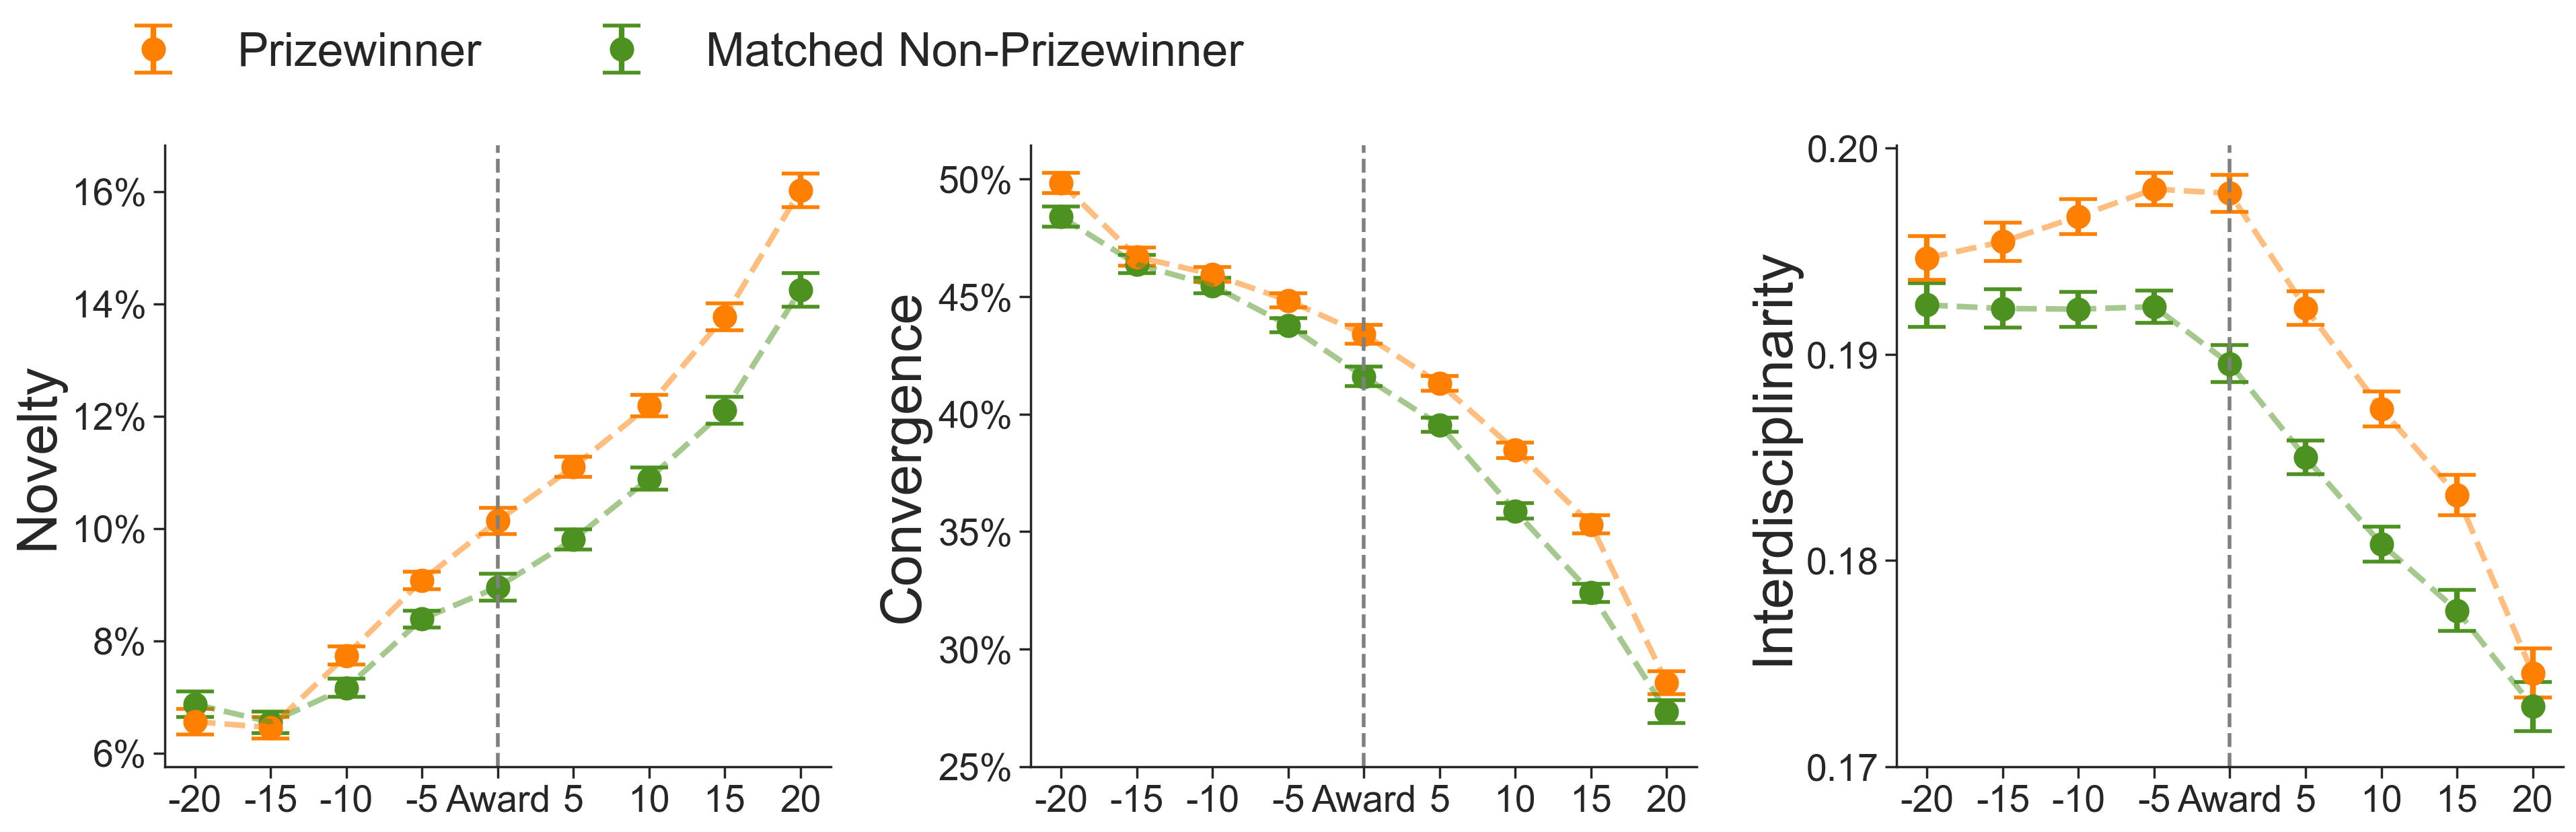

In [6]:
# FIGURE 2B  

def Margin_plot(df,y, ySe, ylabel):
    winner_NPY = df[df["If_prizewinner"]==1]  
    match_NPY = df[df["If_prizewinner"]==0]

    plt.plot(match_NPY["Relative_Publication_year"], match_NPY[y], lw=3, ls="--", color='#4d9221', alpha=0.5)
    plt.errorbar(match_NPY["Relative_Publication_year"], match_NPY[y] , yerr=1.96*match_NPY[ySe] ,
                            fmt ='o',  ms = 12, mfc="#4d9221", mec="#4d9221", 
                            ecolor="#4d9221", elinewidth=3, capsize=10,capthick=2, 
                            label='Matched Non-Prizewinner',zorder=0)  
    
    plt.plot(winner_NPY["Relative_Publication_year"], winner_NPY[y], lw=3, ls="--", color='#ff7f00', alpha=0.5)
    plt.errorbar(winner_NPY["Relative_Publication_year"], winner_NPY[y] , yerr=1.96*match_NPY[ySe] ,
                            fmt ='o', ms = 12, mfc="#ff7f00", mec="#ff7f00", 
                            ecolor="#ff7f00", elinewidth=3, capsize=10, capthick=2, 
                            label='Prizewinner',zorder=0)  
    
    plt.ylabel(ylabel,fontsize=30) 
    plt.axvline(x=0, color="grey", ls="--", lw=2)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    plt.xticks([-20,-15,-10,-5,0,5,10,15,20], 
               ["-20","-15","-10","-5","Award","5","10","15","20"],fontsize=20)
    
# ======== Draw FIGURE 2B ========
fig = plt.figure(dpi=200, figsize=(23, 6))
plt.subplots_adjust(wspace=0.3, hspace=0)
sns.set(style="ticks")

ax1 = fig.add_subplot(1,3,1)
ax1 = Margin_plot(Margin_data_Figure2, "Novelty", "Novelty_se", "Novelty")
plt.yticks([0.06, 0.08, 0.10, 0.12, 0.14, 0.16],fontsize=20)
def to_percent(temp, position):
        return '%.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
handles, labels = plt.gca().get_legend_handles_labels() 
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=25,
           frameon=False, loc='upper left',ncol=2, bbox_to_anchor=(-0.15, 1.25))

ax2 = fig.add_subplot(1,3,2)
ax2 = Margin_plot(Margin_data_Figure2, "Convergence", "Convergence_se", "Convergence")
plt.yticks([0.25,0.30, 0.35, 0.40, 0.45, 0.5],fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

ax3 = fig.add_subplot(1,3,3)
ax3 = Margin_plot(Margin_data_Figure2, "Interdisciplinarity", "Interdisciplinarity_se", "Interdisciplinarity")
plt.yticks([0.170, 0.180,  0.190,  0.2],fontsize=20);

plt.show()

# FIGURE 4

In [33]:
# LOAD DATA
data_Fig_4 = pd.read_pickle('data_Fig_4.pkl') 

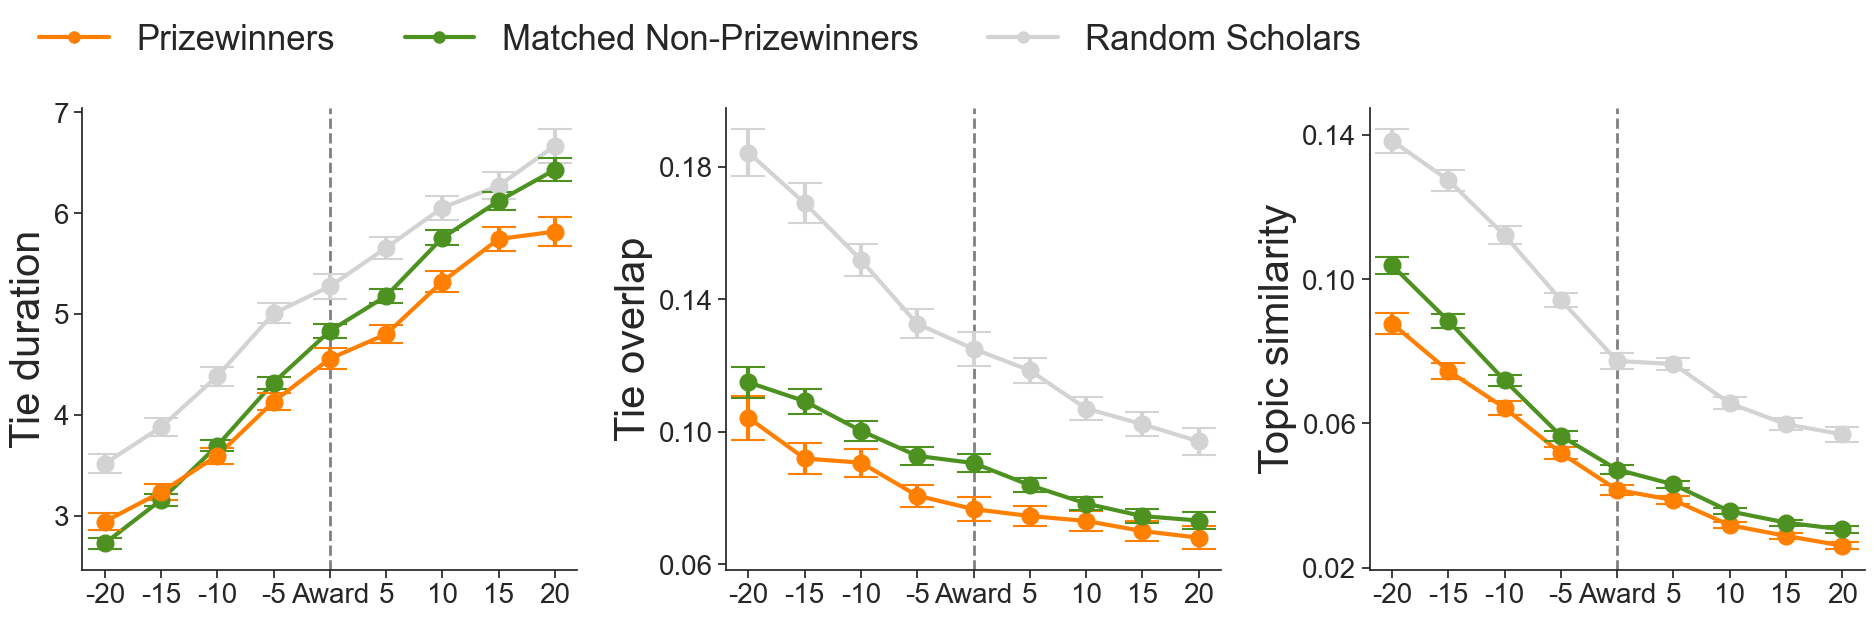

In [38]:
# FIGURE 4

def ci95(lists):
    arr = np.array(lists)
    arr = arr[~np.isnan(arr)]  
    count = len(arr)
    mean = np.nanmean(lists)  
    std = np.nanstd(lists, ddof=1)   
    return 1.96 * std / np.sqrt(count)

fig, axes = plt.subplots(1, 3, figsize=(23, 6))
plt.subplots_adjust(wspace=0.3, hspace=0)
sns.set(style="ticks")

# ======== COLOR SETTING ========
color_dict_four = {
    "Prizewinners": '#ff7f00',
    "Matched Non-Prizewinners": '#4d9221',
    "Random Scholars": 'lightgrey'  
}

sta_1 = data_Fig_4.groupby(['Author_id','Group','Type','Relative_Publication_year_class'],as_index=False)[['Tie_duration', 'Tie_overlap','Topic_similarity']].mean() 
sta_2 = sta_1.groupby(['Group','Type','Relative_Publication_year_class'],as_index=False)[['Tie_duration', 'Tie_overlap','Topic_similarity']].mean() 

sta_3 = sta_2.groupby(['Type','Relative_Publication_year_class'],as_index=False)[['Tie_duration', 'Tie_overlap','Topic_similarity']].agg(['mean', ci95]) 
sta_3 = sta_3.reset_index()

pw = sta_3[sta_3.Type=='Prizewinners']
npw = sta_3[sta_3.Type=='Matched Non-Prizewinners']
rnpw = sta_3[sta_3.Type=='Random Scholars']  

# ======== Draw FIGURE 4 ========
# --------------------- Tie duration ---------------------
plt.sca(axes[0])
plt.axvline(x=0, color="grey", ls="--", lw=2)
# Random Scholars
plt.plot(rnpw['Relative_Publication_year_class'], rnpw['Tie_duration']['mean'], ls="-", lw=3, 
         color=color_dict_four["Random Scholars"], marker="o", markersize=8, label="Random Scholars")
plt.errorbar(rnpw['Relative_Publication_year_class'], rnpw['Tie_duration']['mean'], fmt="o", 
             yerr=rnpw['Tie_duration']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Random Scholars"], 
             ecolor=color_dict_four["Random Scholars"], alpha=1)

# Matched Non-Prizewinners
plt.plot(npw['Relative_Publication_year_class'], npw['Tie_duration']['mean'], ls="-", lw=3, 
         color=color_dict_four["Matched Non-Prizewinners"], marker="o", markersize=8, label="Matched Non-Prizewinners")
plt.errorbar(npw['Relative_Publication_year_class'], npw['Tie_duration']['mean'], fmt="o", 
             yerr=npw['Tie_duration']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Matched Non-Prizewinners"], 
             ecolor=color_dict_four["Matched Non-Prizewinners"], alpha=1)

# Prizewinners
plt.plot(pw['Relative_Publication_year_class'], pw['Tie_duration']['mean'], ls="-", lw=3, 
         color=color_dict_four["Prizewinners"], marker="o", markersize=8, label="Prizewinners")
plt.errorbar(pw['Relative_Publication_year_class'], pw['Tie_duration']['mean'], fmt="o", 
             yerr=pw['Tie_duration']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Prizewinners"], 
             ecolor=color_dict_four["Prizewinners"], alpha=1)

plt.ylabel("Tie duration", fontsize=30)
plt.yticks(fontsize=20)
plt.xticks([-20, -15, -10, -5, 0, 5, 10, 15, 20],
           ["-20", "-15", "-10", "-5", "Award", "5", "10", "15", "20"], fontsize=20)
ax0 = plt.gca()
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

handles, labels = ax0.get_legend_handles_labels()
order = [2, 1, 0]
ax0.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    fontsize=25, frameon=False, ncol=3,
    loc="upper left", bbox_to_anchor=(-0.15, 1.25)
)

# --------------------- Tie overlap ---------------------
plt.sca(axes[1])
plt.axvline(x=0, color="grey", ls="--", lw=2)
# Prizewinners
plt.plot(pw['Relative_Publication_year_class'], pw['Tie_overlap']['mean'], ls="-", lw=3, 
         color=color_dict_four["Prizewinners"], marker="o", markersize=8, label="Prizewinners")
plt.errorbar(pw['Relative_Publication_year_class'], pw['Tie_overlap']['mean'], fmt="o", 
             yerr=pw['Tie_overlap']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Prizewinners"], 
             ecolor=color_dict_four["Prizewinners"], alpha=1)

# Matched Non-Prizewinners
plt.plot(npw['Relative_Publication_year_class'], npw['Tie_overlap']['mean'], ls="-", lw=3, 
         color=color_dict_four["Matched Non-Prizewinners"], marker="o", markersize=8, label="Matched Non-Prizewinners")
plt.errorbar(npw['Relative_Publication_year_class'], npw['Tie_overlap']['mean'], fmt="o", 
             yerr=npw['Tie_overlap']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Matched Non-Prizewinners"], 
             ecolor=color_dict_four["Matched Non-Prizewinners"], alpha=1)

# Random Scholars
plt.plot(rnpw['Relative_Publication_year_class'], rnpw['Tie_overlap']['mean'], ls="-", lw=3, 
         color=color_dict_four["Random Scholars"], marker="o", markersize=8, label="Random Scholars")
plt.errorbar(rnpw['Relative_Publication_year_class'], rnpw['Tie_overlap']['mean'], fmt="o", 
             yerr=rnpw['Tie_overlap']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Random Scholars"], 
             ecolor=color_dict_four["Random Scholars"], alpha=1)

plt.ylabel("Tie overlap", fontsize=30)
plt.yticks([0.06, 0.10, 0.14, 0.18], fontsize=20)
plt.xticks([-20, -15, -10, -5, 0, 5, 10, 15, 20],
           ["-20", "-15", "-10", "-5", "Award", "5", "10", "15", "20"], fontsize=20)
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --------------------- Topic similarity ---------------------
plt.sca(axes[2])
plt.axvline(x=0, color="grey", ls="--", lw=2)
# Prizewinners
plt.plot(pw['Relative_Publication_year_class'], pw['Topic_similarity']['mean'], ls="-", lw=3, 
         color=color_dict_four["Prizewinners"], marker="o", markersize=8, label="Prizewinners")
plt.errorbar(pw['Relative_Publication_year_class'], pw['Topic_similarity']['mean'], fmt="o", 
             yerr=pw['Topic_similarity']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Prizewinners"], 
             ecolor=color_dict_four["Prizewinners"], alpha=1)

# Matched Non-Prizewinners
plt.plot(npw['Relative_Publication_year_class'], npw['Topic_similarity']['mean'], ls="-", lw=3, 
         color=color_dict_four["Matched Non-Prizewinners"], marker="o", markersize=8, label="Matched Non-Prizewinners")
plt.errorbar(npw['Relative_Publication_year_class'], npw['Topic_similarity']['mean'], fmt="o", 
             yerr=npw['Topic_similarity']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Matched Non-Prizewinners"], 
             ecolor=color_dict_four["Matched Non-Prizewinners"], alpha=1)

# Random Scholars
plt.plot(rnpw['Relative_Publication_year_class'], rnpw['Topic_similarity']['mean'], ls="-", lw=3, 
         color=color_dict_four["Random Scholars"], marker="o", markersize=8, label="Random Scholars")
plt.errorbar(rnpw['Relative_Publication_year_class'], rnpw['Topic_similarity']['mean'], fmt="o", 
             yerr=rnpw['Topic_similarity']['ci95'], markersize=12, capsize=12,
             capthick=1.5, elinewidth=3, color=color_dict_four["Random Scholars"], 
             ecolor=color_dict_four["Random Scholars"], alpha=1)

plt.ylabel("Topic similarity", fontsize=30)
plt.yticks([0.02, 0.06, 0.10, 0.14], fontsize=20)
plt.xticks([-20, -15, -10, -5, 0, 5, 10, 15, 20],
           ["-20", "-15", "-10", "-5", "Award", "5", "10", "15", "20"], fontsize=20)
ax2 = plt.gca()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show() 